In [99]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [100]:
# read the datas
data = pd.read_csv('Data_For_project_1.csv')
data

survived     sex   age  n_siblings_spouses  parch     fare   class  \
0           0    male  22.0                   1      0   7.2500   Third   
1           1  female  38.0                   1      0  71.2833   First   
2           1  female  26.0                   0      0   7.9250   Third   
3           1  female  35.0                   1      0  53.1000   First   
4           0    male  28.0                   0      0   8.4583   Third   
..        ...     ...   ...                 ...    ...      ...     ...   
622         0    male  28.0                   0      0  10.5000  Second   
623         0    male  25.0                   0      0   7.0500   Third   
624         1  female  19.0                   0      0  30.0000   First   
625         0  female  28.0                   1      2  23.4500   Third   
626         0    male  32.0                   0      0   7.7500   Third   

        deck  embark_town alone  
0    unknown  Southampton     n  
1          C    Cherbourg     n  
2    unknown  Southampton     y  
3          C  Southampton     n  
4    unknown   Queenstown     y  
..       ...          ...   ...  
622  unknown  Southampton     y  
623  unknown  Southampton     y  
624        B  Southampton     y  
625  unknown  Southampton     n  
626  unknown   Queenstown     y  

[627 rows x 10 columns]

In [101]:
data.tail()

survived     sex   age  n_siblings_spouses  parch   fare   class  \
622         0    male  28.0                   0      0  10.50  Second   
623         0    male  25.0                   0      0   7.05   Third   
624         1  female  19.0                   0      0  30.00   First   
625         0  female  28.0                   1      2  23.45   Third   
626         0    male  32.0                   0      0   7.75   Third   

        deck  embark_town alone  
622  unknown  Southampton     y  
623  unknown  Southampton     y  
624        B  Southampton     y  
625  unknown  Southampton     n  
626  unknown   Queenstown     y

In [102]:
data.describe()

survived         age  n_siblings_spouses       parch        fare
count  627.000000  627.000000          627.000000  627.000000  627.000000
mean     0.387560   29.631308            0.545455    0.379585   34.385399
std      0.487582   12.511818            1.151090    0.792999   54.597730
min      0.000000    0.750000            0.000000    0.000000    0.000000
25%      0.000000   23.000000            0.000000    0.000000    7.895800
50%      0.000000   28.000000            0.000000    0.000000   15.045800
75%      1.000000   35.000000            1.000000    0.000000   31.387500
max      1.000000   80.000000            8.000000    5.000000  512.329200

In [103]:
#clean the data....
data.describe(include="O")

sex  class     deck  embark_town alone
count    627    627      627          627   627
unique     2      3        8            4     2
top     male  Third  unknown  Southampton     y
freq     410    341      481          450   372

In [104]:
data.shape

(627, 10)

In [105]:
data['sex'].value_counts()

male      410
female    217
Name: sex, dtype: int64

In [106]:
data['survived'].value_counts()

0    384
1    243
Name: survived, dtype: int64

In [107]:
data['deck'].unique()

array(['unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'], dtype=object)

In [108]:
data['deck'].value_counts()

unknown    481
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: deck, dtype: int64

In [109]:
data['embark_town'].value_counts()

Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64

In [110]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [111]:
data['embark_town'].value_counts()

Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64

In [112]:
data.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [113]:
for column in ['sex']:
    mode_val = data[column].mode()[0]
    data[column].fillna(mode_val,inplace=True)

for column in ['age']:
    median_val = data[column].median()
    data[column].fillna(median_val, inplace=True)

In [114]:
data.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [115]:
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# # 1. Handle Missing Values: Using mean for numerical columns and most frequent for categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# # Numerical columns
data['age'] = num_imputer.fit_transform(data[['age']])
data['fare'] = num_imputer.fit_transform(data[['fare']])

# # Categorical columns
data['sex'] = cat_imputer.fit_transform(data[['sex']])
data['class'] = cat_imputer.fit_transform(data[['class']])
data['embark_town'] = cat_imputer.fit_transform(data[['embark_town']])
data['deck'] = cat_imputer.fit_transform(data[['deck']])
data.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

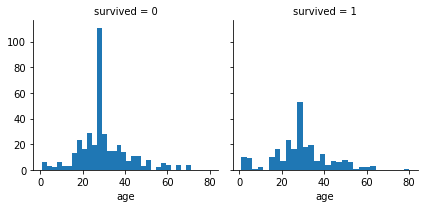

In [116]:
v2=sns.FacetGrid(data, col='survived')
v2.map(plt.hist,'age',bins=30)

In [117]:
data.duplicated().sum()

69

In [118]:
data.drop_duplicates(inplace=True)

In [119]:
data.duplicated().sum()

0

In [120]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [121]:
data.dropna(inplace=True)

In [122]:
data=data.drop(['age','deck','n_siblings_spouses','embark_town'],axis=1)

In [123]:
data.head(10)

survived     sex  parch     fare   class alone
0         0    male      0   7.2500   Third     n
1         1  female      0  71.2833   First     n
2         1  female      0   7.9250   Third     y
3         1  female      0  53.1000   First     n
4         0    male      0   8.4583   Third     y
5         0    male      1  21.0750   Third     n
6         1  female      2  11.1333   Third     n
7         1  female      0  30.0708  Second     n
8         1  female      1  16.7000   Third     n
9         0    male      0   8.0500   Third     y

In [124]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns
data['sex'] = le.fit_transform(data['sex'])
data['class'] = le.fit_transform(data['class'])
data['alone'] = le.fit_transform(data['alone'])



data.head(5)

survived  sex  parch     fare  class  alone
0         0    1      0   7.2500      2      0
1         1    0      0  71.2833      0      0
2         1    0      0   7.9250      2      1
3         1    0      0  53.1000      0      0
4         0    1      0   8.4583      2      1

In [125]:
data.to_csv("Data_For_project_2.csv",index=False)

In [126]:
data = pd.read_csv('Data_For_project_2.csv')

          survived       sex     parch      fare     class     alone
survived  1.000000 -0.562488  0.079526  0.247788 -0.336921 -0.178160
sex      -0.562488  1.000000 -0.217856 -0.162669  0.145966  0.285334
parch     0.079526 -0.217856  1.000000  0.182310  0.046310 -0.566479
fare      0.247788 -0.162669  0.182310  1.000000 -0.540128 -0.223609
class    -0.336921  0.145966  0.046310 -0.540128  1.000000  0.114812
alone    -0.178160  0.285334 -0.566479 -0.223609  0.114812  1.000000


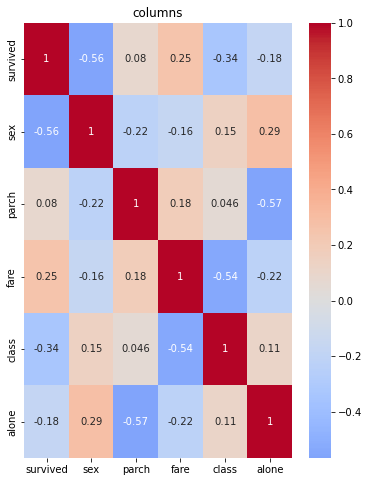

In [127]:
# specific_columns =  list(df.columns)
# # specific_columns.append('fsr_tripFual')
# # Create a subset DataFrame with the specific columns
# subset_data = df[specific_columns]
# print(specific_columns)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for the specific columns
corr_matrix = data.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('columns')
plt.show()


In [128]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [130]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8125


In [131]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57 15]
 [ 6 34]]


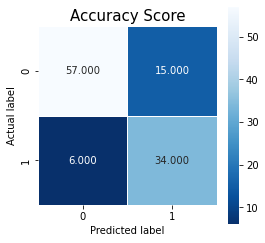

In [132]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [133]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [134]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8125


In [135]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57 15]
 [ 6 34]]


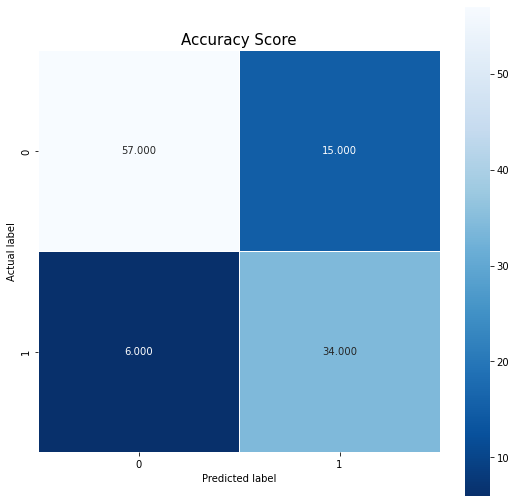

In [136]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [137]:
data

survived  sex  parch     fare  class  alone
0           0    1      0   7.2500      2      0
1           1    0      0  71.2833      0      0
2           1    0      0   7.9250      2      1
3           1    0      0  53.1000      0      0
4           0    1      0   8.4583      2      1
..        ...  ...    ...      ...    ...    ...
553         0    0      0  10.5167      2      1
554         0    1      0  10.5000      1      1
555         1    0      0  30.0000      0      1
556         0    0      2  23.4500      2      0
557         0    1      0   7.7500      2      1

[558 rows x 6 columns]

In [138]:
import joblib
model_filename = 'model'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model


In [139]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)


In [141]:
    test = model_data.predict(X_test.head(2))
    test


array([1, 0], dtype=int64)

In [142]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [143]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [144]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

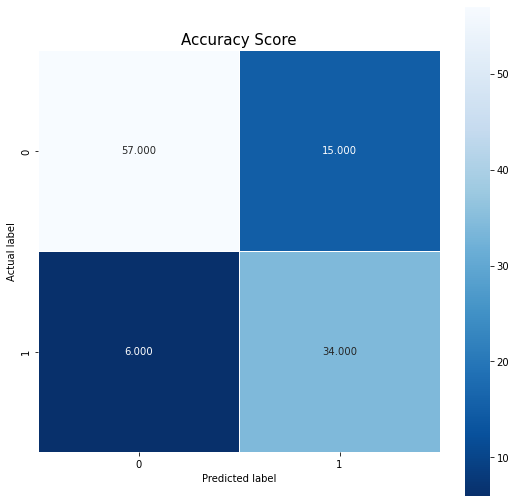

In [146]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [149]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


%matplotlib inline
X_train

array([[-1.3297413 , -0.48944735, -0.40077627, -0.27012373,  0.89973541],
       [ 0.75202598, -0.48944735, -0.5161948 ,  0.89391463,  0.89973541],
       [-1.3297413 , -0.48944735, -0.10942149, -0.27012373, -1.11143786],
       ...,
       [ 0.75202598, -0.48944735, -0.48526007,  0.89391463,  0.89973541],
       [-1.3297413 , -0.48944735, -0.48995362,  0.89391463,  0.89973541],
       [ 0.75202598, -0.48944735, -0.62265293, -0.27012373,  0.89973541]])